<a href="https://colab.research.google.com/github/DataAnalyticSscience/business-case-studies/blob/main/Supervised_Machine_Learning_Music_Recommendation_System_Spotify_Part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System Part I**

## **Analysis Background**

### **Problem Definition**
---

- **The context:** Why is this problem important to solve?
- **The objectives:** What is the intended goal?
- **The key questions:** What are the key questions that need to be answered?
- **The problem formulation:** What are we trying to solve using data science?

### **Context**
---

Music streaming platforms like **`Apple Music`**, **`Spotify`**, **`Amazon Music`** are built on the premise of providing the latest and greatest songs / music to listeners. These platforms usually have inventories or libraries of music they can recommend to their listeners at any given time.

Similarly, **`Echo Nest Music Recording`** has provided us with a dataset of songs and other metadata with the goal of helping them improve customer loyalty and experience.

- In order to improve customer experience and thereby loyalty, we can build a **recommendation system** to recommend songs to the users based on **`their historical interactions with other songs`**.

  - We believe that this would improve customer experience. Increased customer experience is likely to **`drive revenue as well as customer loyalty for the company`**.|

### **Objective**
---

Using the dataset provided,  we will build and test the following recommendation systems, then we will select the best model using KPIs like **`Precision`**, **`Recall`**, and **`F_1 score`** to help **`Echo Nest Music Recording`** improve **`users' experiences`** and **`drive revenue`** for the company.

- **`Rank Based Recommendation System`**
- **`Clustering-based recommendation system`**
- **`Content-based collaborative filtering`**
- **`Hybrid recommendation systems`**

### **Key Questions**
---

Some of the key questions we are looking to answer include, but are not limited to the following:

- **Which user interacted the most with songs in the dataset?**
- **What is the distribution of the user-song interactions in this dataset?**
- **What are the songs with the most interactions?**

### **The Problem Statement**
---

As stated above, **`Echo Nest Music Recording Company`** has a repository of songs that their customers / listeners can access and play at any given time. We believe that by building a Recommendation System to recommend relevant songs to each user, based on their listening history and that of other users similar to them, we can accomplish the following for the business:
- **`Improve listeners experience`**
- **`Increase listener satisfaction`**
- **`Drive customer / listener loyalty`**
- **`Drive revenue growth for Echo Nest Music Recording Company`**

### **Methodology**
---

**Potential techniques:** What different techniques should be explored?
- Some of the techniques we tend to employ include, but are not limited to the following:
  - **`Rank Based Recommendation System`** - will help us understand and recommend the following:
    - Recommend n songs with n minimum interactions
    - Recommend n songs with n maximum interactions
  - **`Clustering-based recommendation system`** - leveraging clustering will allow us to address some of the following questions / challenges:
    - Find similarity in user preferences
    - Recommend songs based on similar user preferences
  - **`Content-based collaborative filtering`** - will allow us to leverage user item interactions data to build a collaborative recommendation system.
    - For example, we can leverage play_count in our dataset to apply this type of technique
  - **`Hybrid recommendation systems`** - will allow us to combine multiple recommender systems to help us deal with some of the following:
    - Avoid recommending only similar songs
    - Overcome false nearest neighbors
    - Provide more personalized recommendations to listeners

**Measures of success:** What are the key measures of success to compare different potential technqiues?
- Some of the key performance indicators that will signal the recommendation system’s ability to recommend the rights songs, or lack thereof includes the following:
  - RMSE
  - Precision
  - Recall
  - F_1 score

### **Data Dictionary**
---

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data:

- **`song_id`** - A unique id given to every song
- **`title`** - Title of the song
- **`Release`** - Name of the released album
- **`Artist_name`** - Name of the artist
- **`year`** - Year of release

count_data:
- **`user _id`** - A unique id given to the user
- **`song_id`** - A unique id given to the song
- **`play_count`** - Number of times the song was played

### **Data Source**
---
Source: http://millionsongdataset.com/

## **Preparing The Evironment**

### **Importing Libraries and the Dataset**

In [135]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

# Performs label encoding
from sklearn import preprocessing

# label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()

### **Load the dataset**

In [137]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/ds_datasets/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/ds_datasets/song_data.csv')

## **Data Evaluation**

### **Preview datasets**

In [138]:
# See top records of count_df data
count_df.head()

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [139]:
# See top records of song_df data
song_df.head(5)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


### **Check datasets structures**

In [140]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


**Observations and Insights:**

The datasets comprises primarily `object` and `integer` types. Here are more observations:
- count dataframe
  - There are **`2,000,000` observations** and **4 columns** in the data.
  - There's an **`Unnamed column`** that needs to be removed because it adds no value to our analysis.
  - There are no duplicate records present

In [141]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


**Observations and Insights:**

The datasets comprises primarily `object` and `integer` types. Here are more observations:

- song dataframe
  - There are **`1,000,000` observations** and **5 columns** in the data.
  - Given the inconsistent row counts, **it's highly likely that the data contains missing value**. Those missing rows would have to be handled below.
  - This dataframe also has **less records relative to our count dataframe**.
  - There are duplicate records present

### **Check for missing values**

In [142]:
# Check for missing values on the count_df data
count_df.isnull().sum()

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

In [143]:
# Check for missing values on the song_df data
song_df.isnull().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

In [144]:
# how much of the data is missing
def missing(song_df):
    print (round((song_df.isnull().sum() * 100/ len(song_df)),4).sort_values(ascending=False))

missing(song_df)

title          0.0015
release        0.0005
song_id        0.0000
artist_name    0.0000
year           0.0000
dtype: float64


**Observations and Insights:**

- The **`count dataframe`** has no missing values, while some columns in the **`song dataframe`** have missing values. The next logical step would be to treat those before proceeding. But since the columns with missing data won’t be important to building our recommendation system, we can disregard them. Here are some things to note about the missing values:
  - The **`song_id`** column within each data frame has no missing values, but there are duplicate values in the song dataframe that we will handle below.
    - Furthermore, only less than 1% of the data is missing from the **`title`** and **`release`** columns.

### **Merge the datasets**

In [145]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on = 'song_id', how = 'left')

# Drop the column 'Unnamed: 0'
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


### **Encoding categorical feagures**
Since the `user_id` and `song_id` are encrypted, let's encoded them as numeric values.

In [146]:
# Apply label encoding for "user_id" and "song_id"
df['user_id']= label_encoder.fit_transform(df['user_id'])
df['song_id']= label_encoder.fit_transform(df['song_id'])
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


### **Further data manipulation**

Since the data contains both users who have listened to very few songs and vice versa, Let's filter the data so that it contains users who have listened to a good amount of songs and vice versa.

In [147]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [148]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():

    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [149]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [150]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [151]:
# Drop records with play_count more than(>) 5
df_final = df_final.drop(df_final[df_final['play_count'] > 5].index)

In [152]:
# Check the shape of the data
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**
- Total number of unique user id
- Total number of unique song id
- Total number of unique artists

In [153]:
# Display total number of unique user_id
total_unique_users = df_final['user_id'].nunique()

# Display total number of unique song_id
total_unique_songs = df_final['song_id'].nunique()

# Display total number of unique artists
total_unique_artists = df_final['artist_name'].nunique()

print(f"The total number of unique user_id is: {total_unique_users}")
print(f"The total number of unique song_id is: {total_unique_songs}")
print(f"The total number of unique artists is: {total_unique_artists}")

The total number of unique user_id is: 3155
The total number of unique song_id is: 563
The total number of unique artists is: 232


#### **Observations and Insights:**

The dataset contains the following basic statistics / numbers:
- There are **`3155` unique users** within the dataset.
- There are **`563` unique song ids** within the dataset.
- There are **`232` unique artists** within the dataset.

### **Let's find out about the most interacted songs and interacted users**
- Which songs do users interact with the most?
- Which users interacted the most songs?
- How many Songs where played in a year?

#### Songs with most interactions

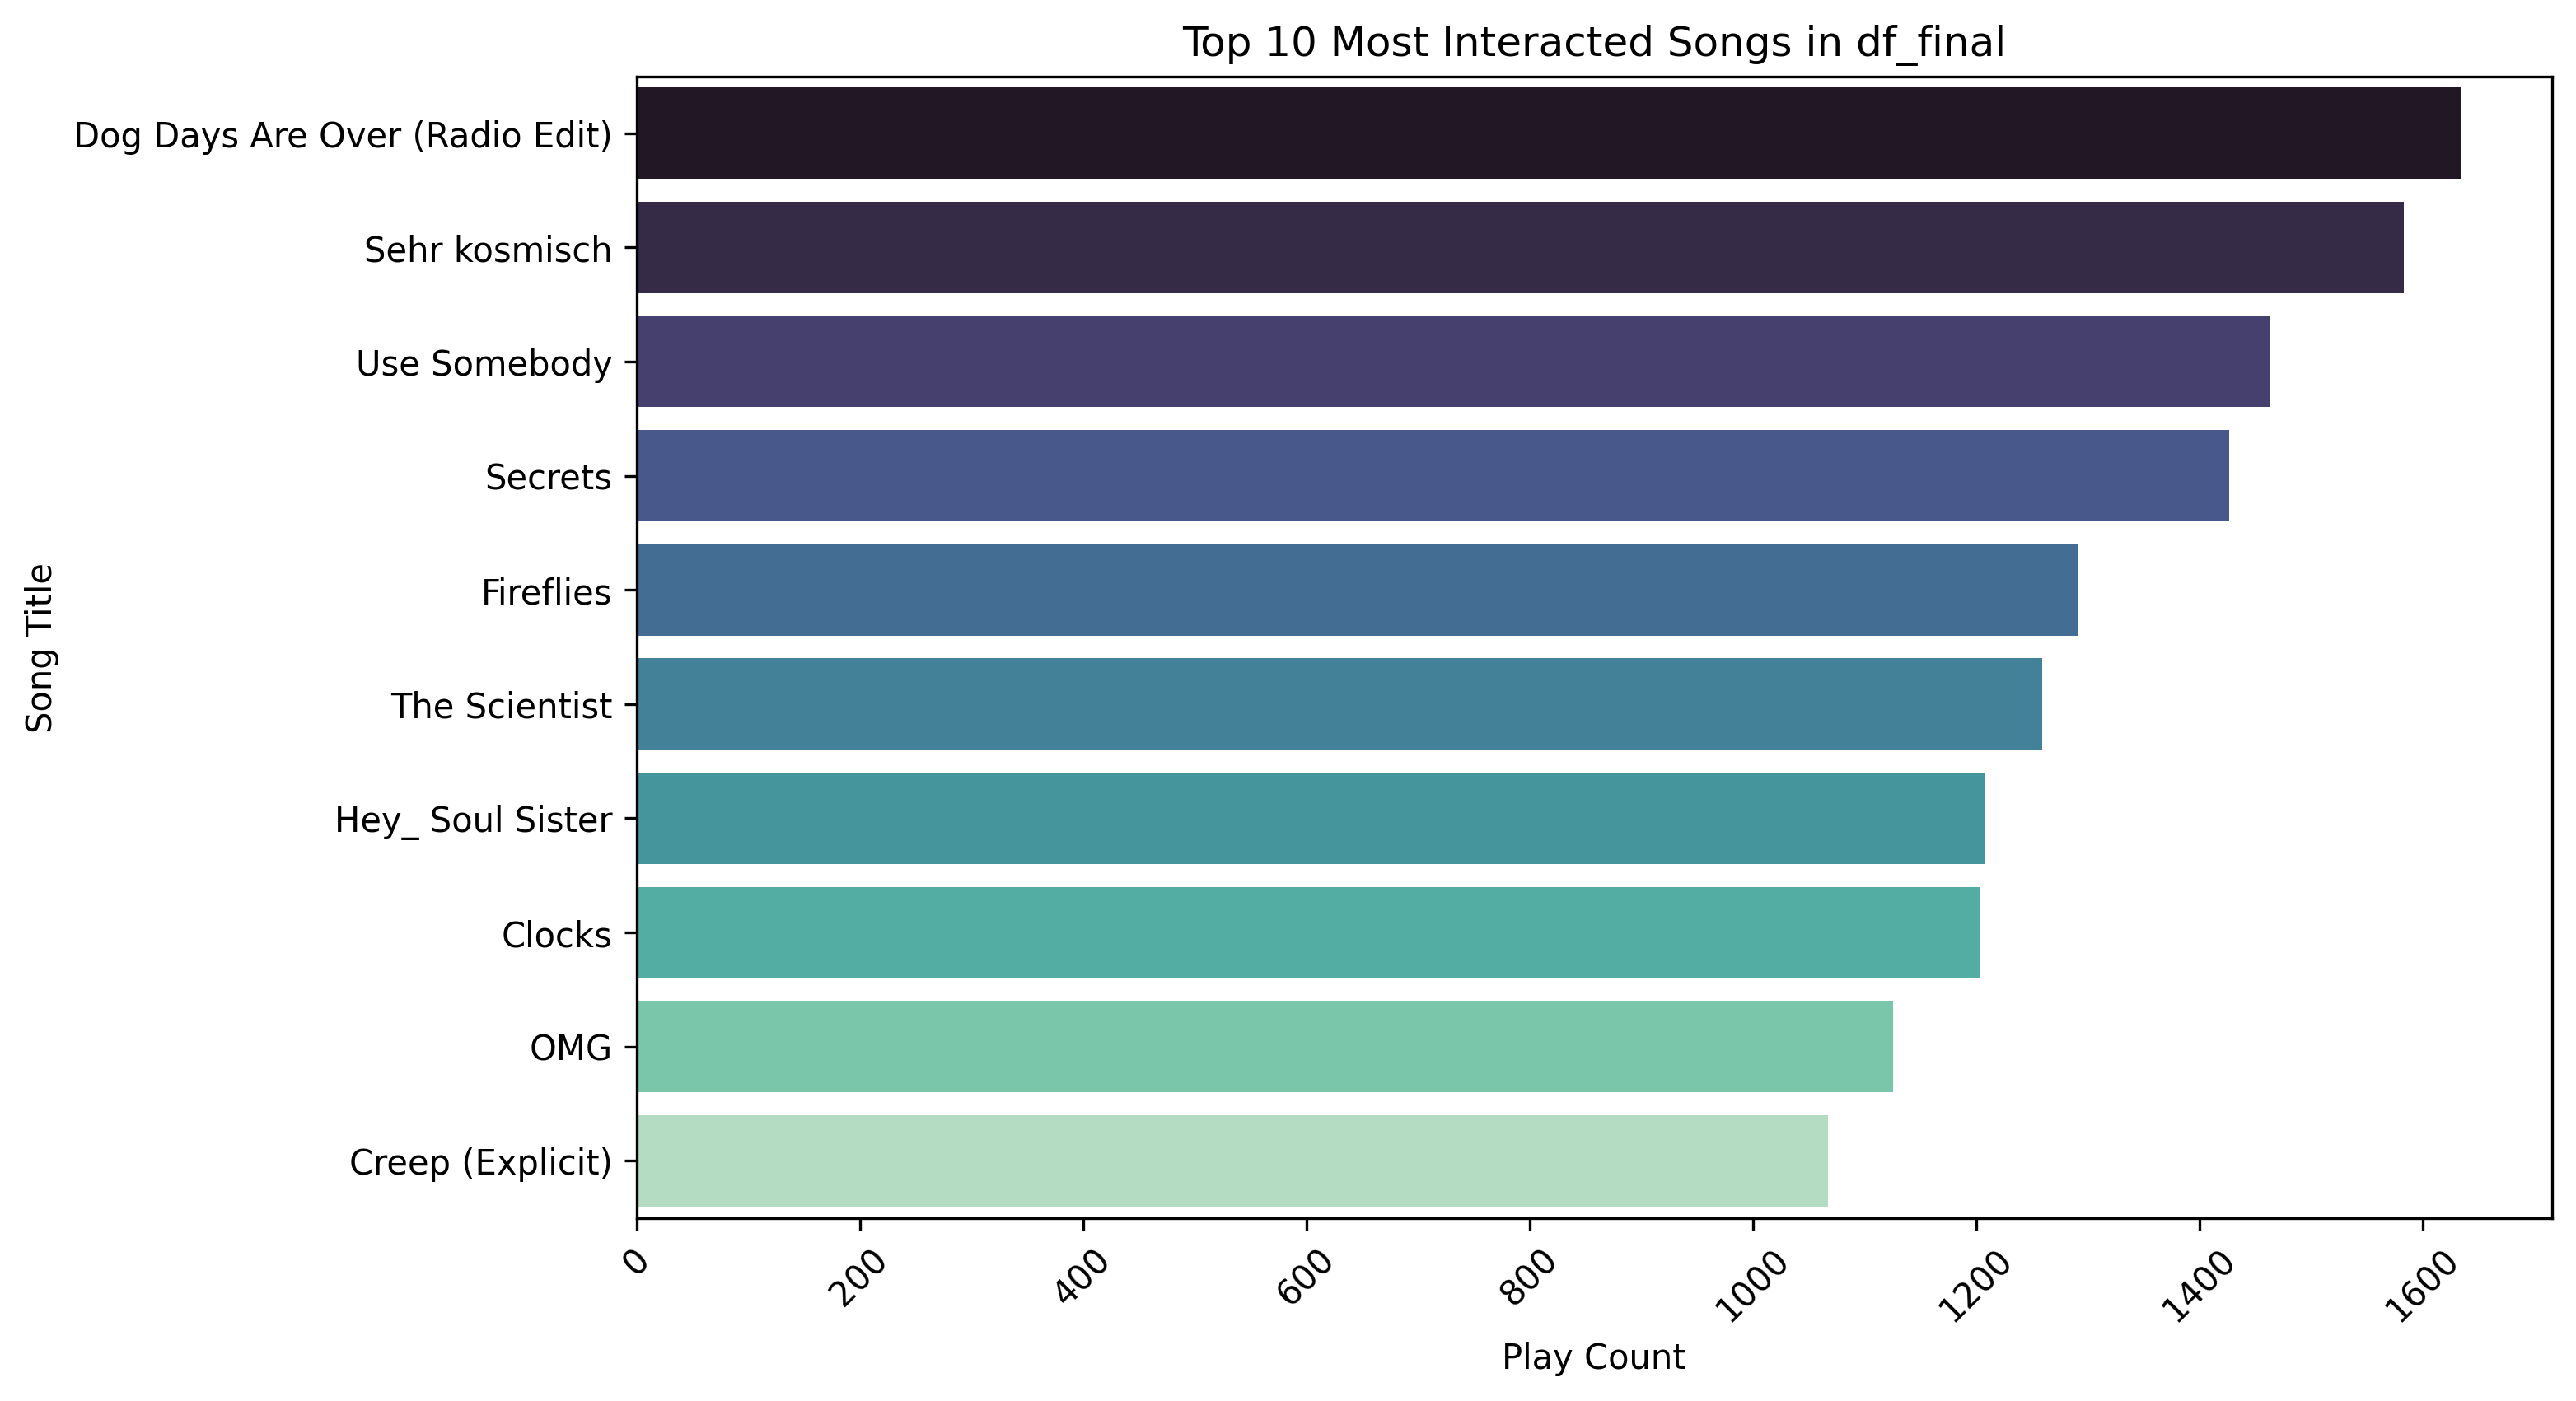

In [154]:
# Identifying the most interacted songs in df_final
most_interacted_songs = df_final.groupby(['song_id', 'title'])['play_count'].sum().sort_values(ascending=False).head(10)

# Preparing data for visualization
most_interacted_songs_df = most_interacted_songs.reset_index()
most_interacted_songs_df

# Visualization
plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(data=most_interacted_songs_df, x='play_count', y='title', palette='mako')
plt.title('Top 10 Most Interacted Songs in df_final')
plt.xlabel('Play Count')
plt.ylabel('Song Title')
plt.xticks(rotation=45)
plt.show()

**Observations and Insights:**

1. **Diverse Music Taste:** The list of top interacted songs includes a variety of genres, indicating a broad range of musical tastes among the users. It features pop, rock, and alternative tracks.
2. **Popular Hits:** Many of these songs, like "Dog Days Are Over," "Use Somebody," "Secrets," and "Fireflies," are well-known hits, suggesting that popular mainstream tracks have a strong presence and appeal in this dataset.
3. **High Engagement Levels:** The play counts for these top songs are notably high (ranging from 1,067 to 1,634), demonstrating significant user engagement with these tracks. This level of engagement is a strong indicator of the songs' popularity and appeal.
4. **Potential for Targeted Recommendations:** Recognizing these popular songs can be crucial for recommendation algorithms. These songs might be good candidates for new user recommendations or for featuring in popular playlists.
5. **Timelessness of Certain Tracks:** Songs like "The Scientist," "Clocks," and "Creep" have been popular for many years, indicating a timeless quality that continues to resonate with listeners.
6. **Emotional and Lyrical Connection:** Some of these songs, such as "The Scientist" by Coldplay or "Creep" by Radiohead, are known for their emotional depth and lyrical content, suggesting that users might be drawn to songs that evoke strong emotions or tell a compelling story.

#### Users who interacted with most users

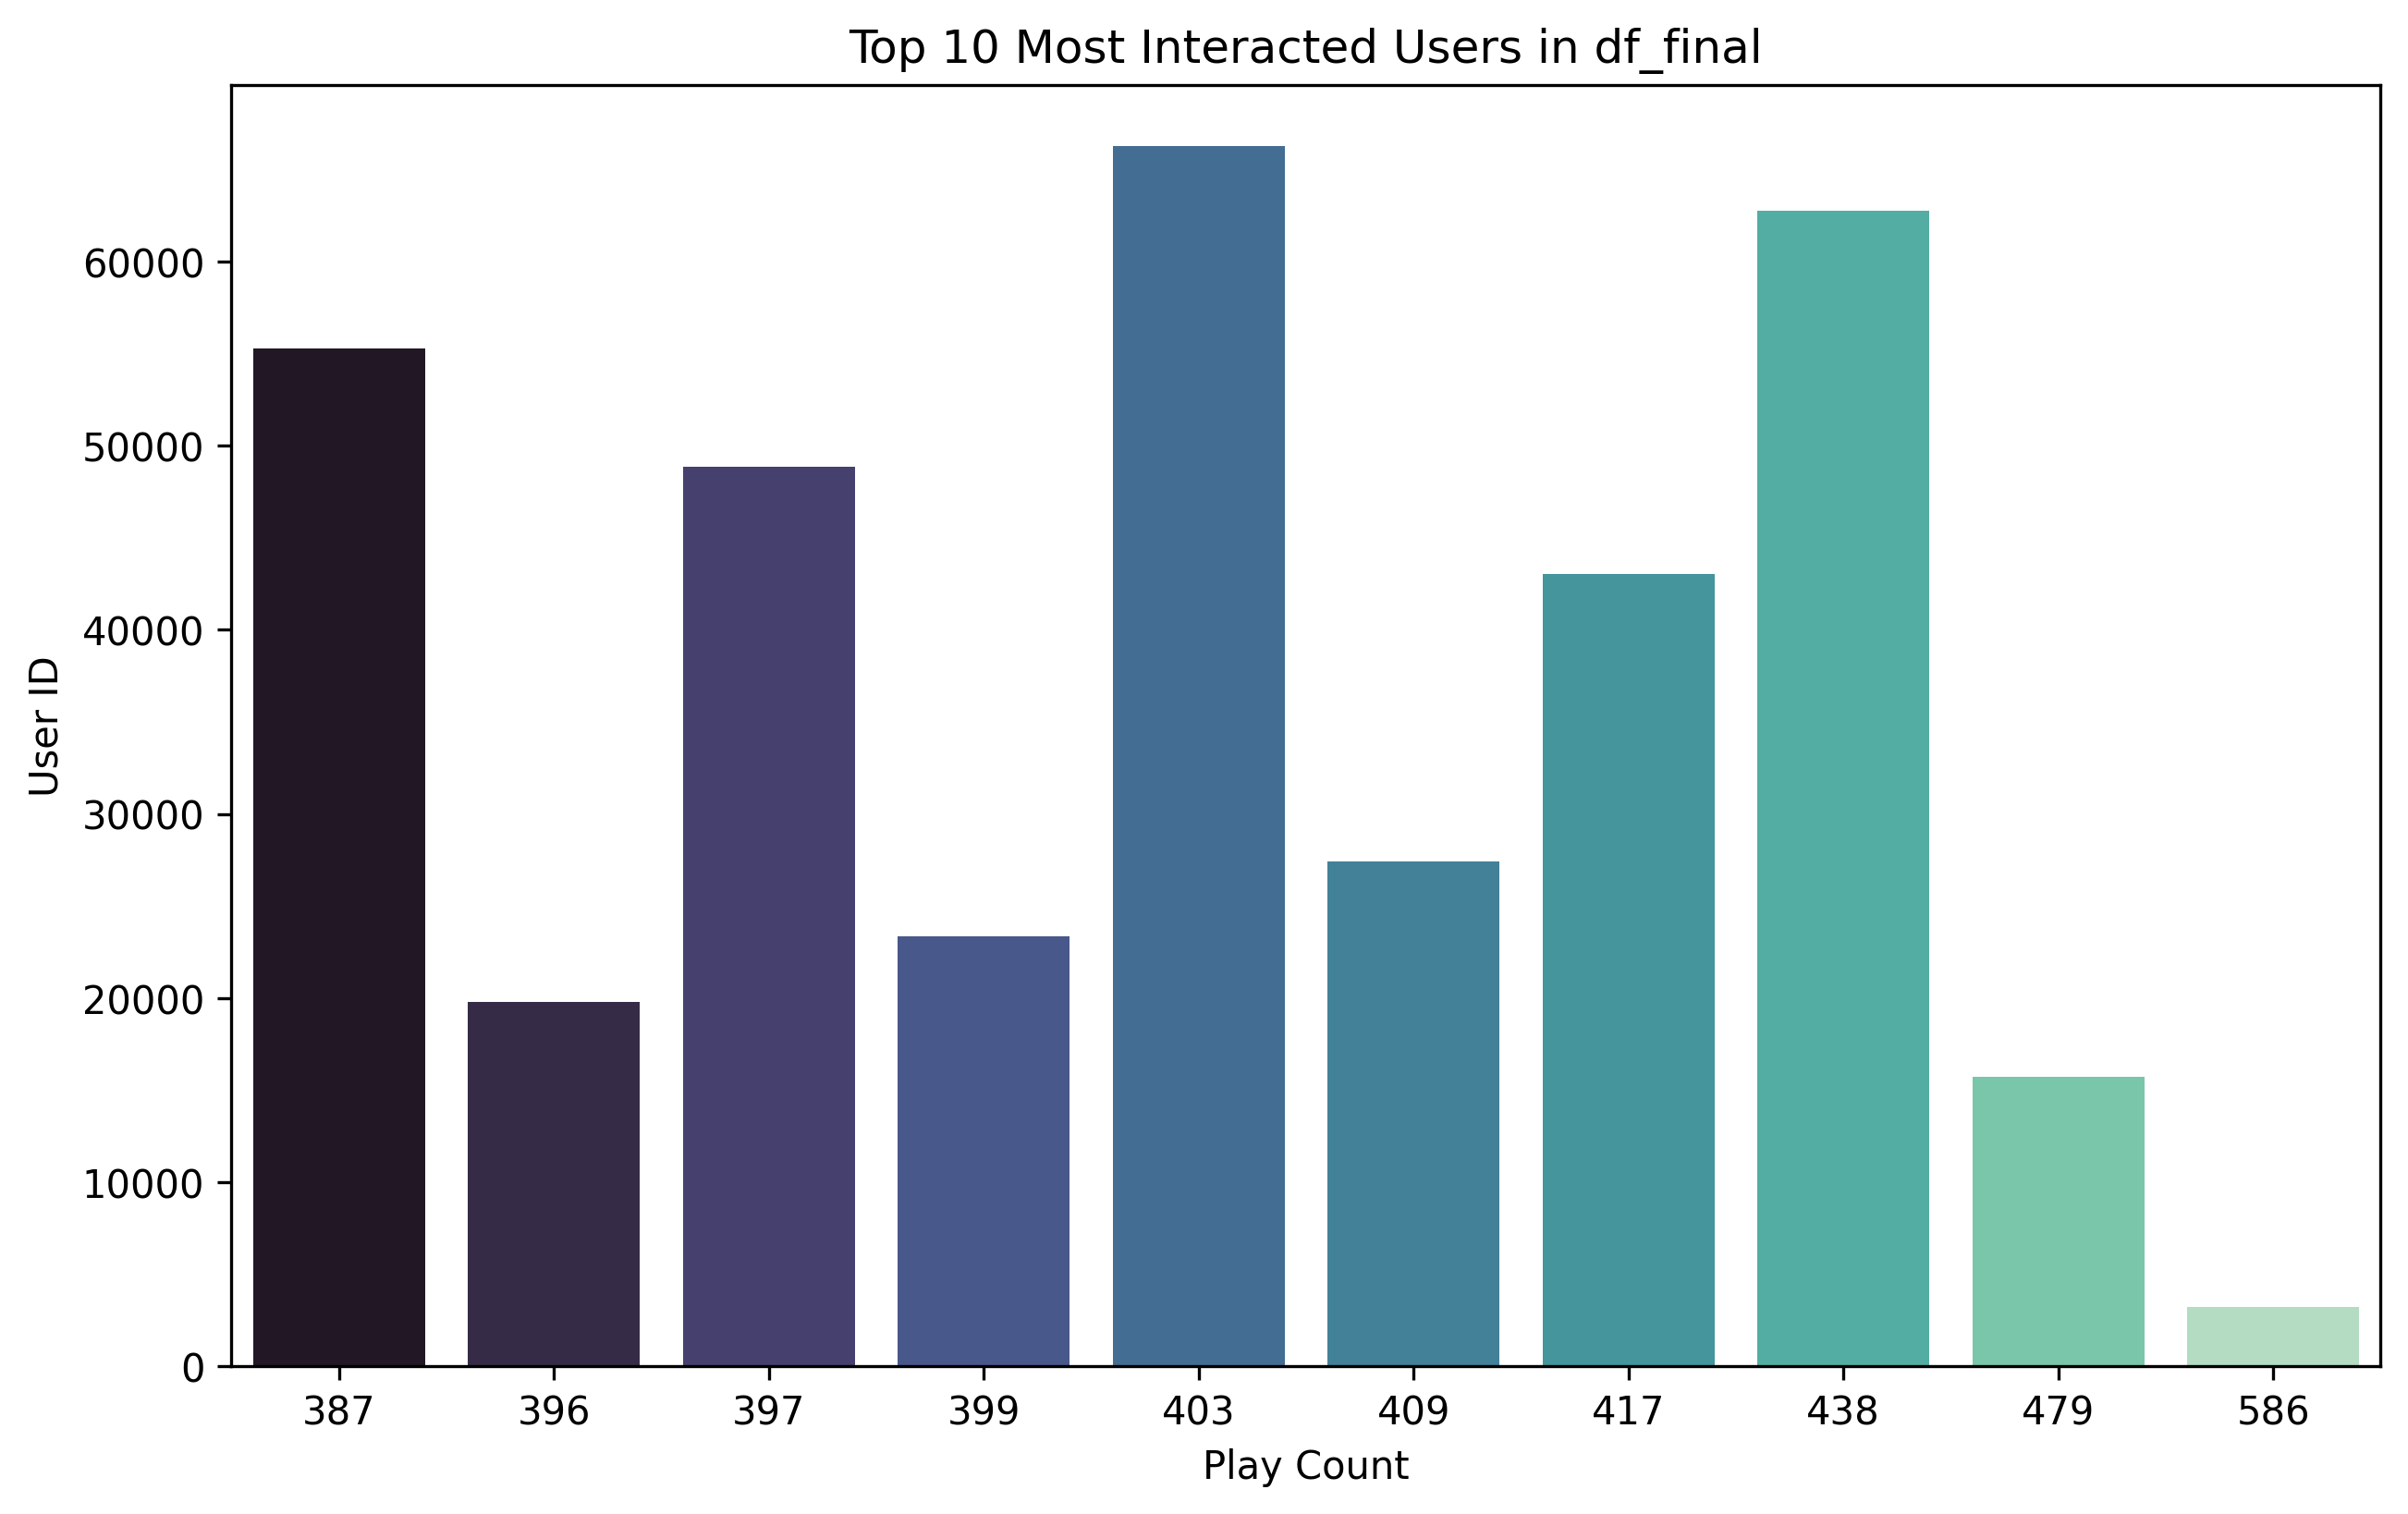

In [155]:
# Identifying the most interacted users in df_final
most_interacted_users = df_final.groupby('user_id')['play_count'].sum().sort_values(ascending=False).head(10)

# Preparing data for visualization
most_interacted_users_df = most_interacted_users.reset_index()
most_interacted_users_df

# Visualization
plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(data=most_interacted_users_df, x='play_count', y='user_id', palette='mako')
plt.title('Top 10 Most Interacted Users in df_final')
plt.xlabel('Play Count')
plt.ylabel('User ID')
plt.show()

**Observations and Insights:**

1. **High Levels of Engagement:** The top user has a play count of 586, and the tenth user has a play count of 387. This range indicates a relatively high level of engagement among these top users, showing their active participation in the platform.
2. **Core User Group:** These users could represent a core user group with significant influence within the overall user base. Their listening habits and preferences might be key in driving trends and popularity within the platform.
3. **Target for Special Features or Promotions:** Since these users are highly active, they could be targeted for beta testing new features, special promotions, or community-building initiatives. Their feedback could be invaluable for improving user experience and engagement strategies.
4. **Diverse Range of Play Counts:** The range in play counts (586 to 387) among these top users suggests varying degrees of user engagement. This diversity can be useful for understanding different user segments within the active user base.
5. **Personalization and Recommendation Opportunities:** Understanding the preferences of these users can be crucial for refining recommendation algorithms. Personalized content, curated playlists, or recommendations based on their listening patterns could enhance their experience and maintain their high engagement levels.
6. **User Retention Strategies:** Recognizing and perhaps rewarding these top users could be an effective strategy for user retention. Their continued engagement is likely beneficial for the platform's overall health and vibrancy.

#### The number of Songs played in a year

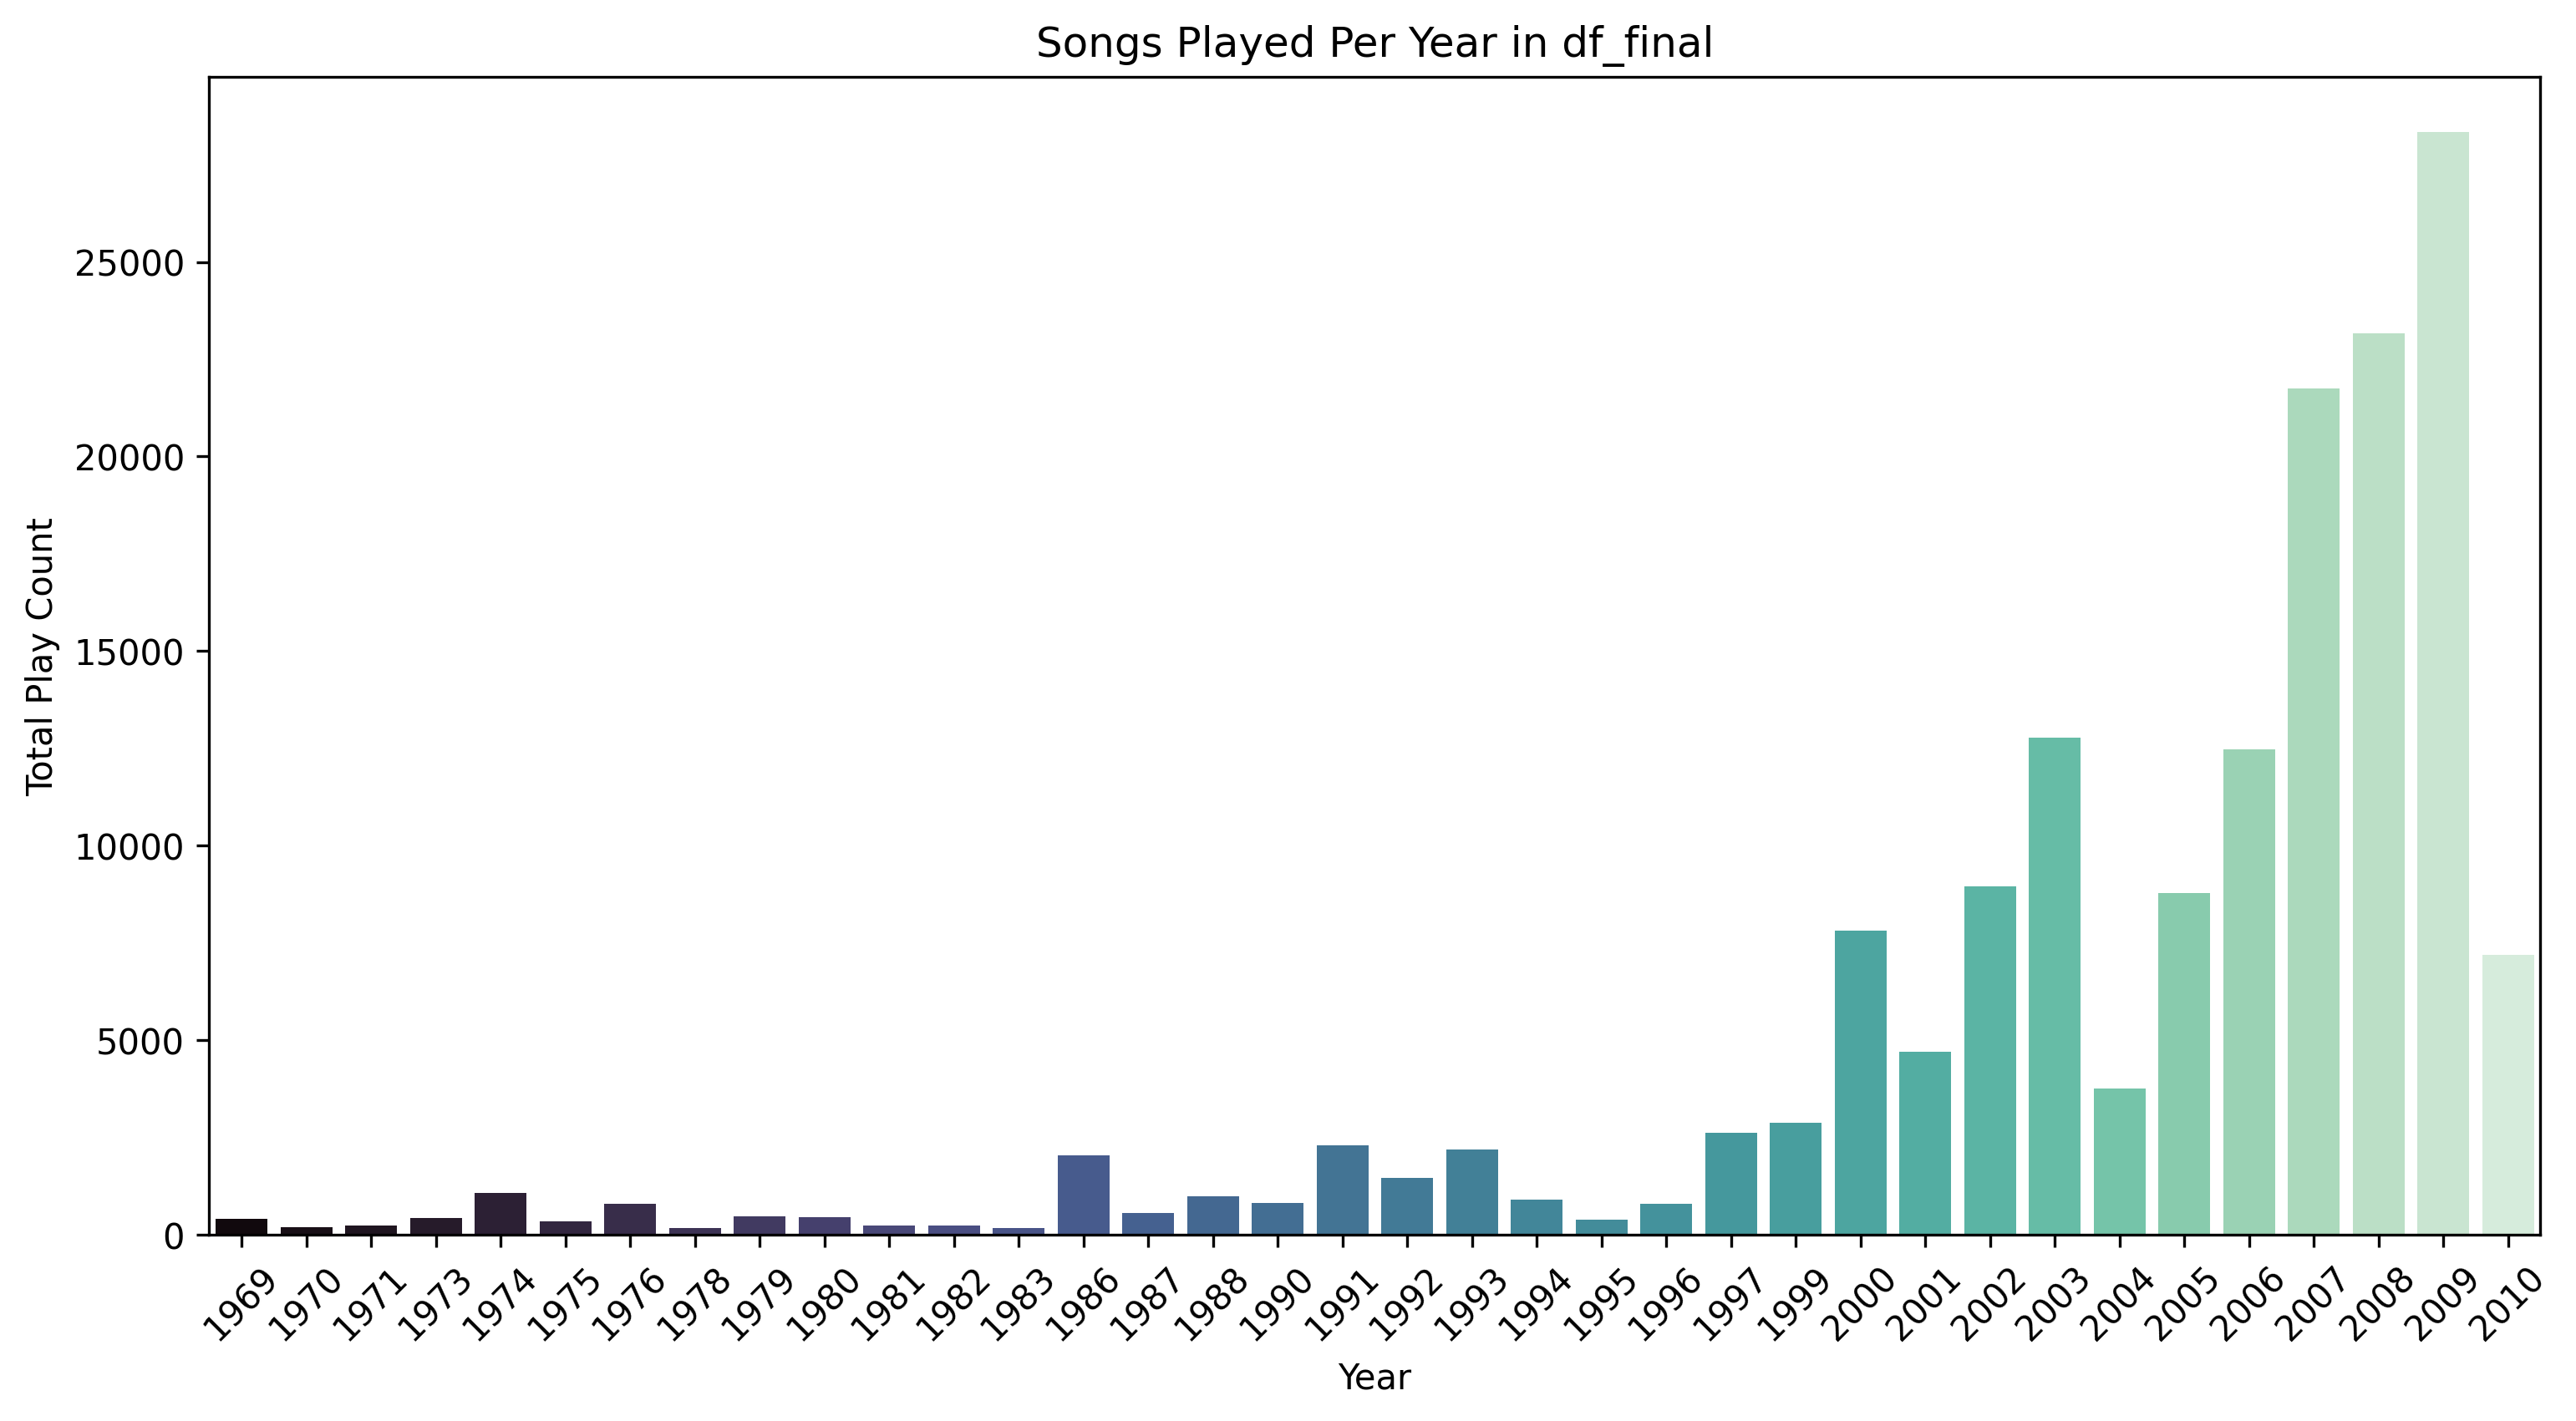

In [156]:
# Analyzing songs played per year in df_final
# Filtering out entries with year as 0 or missing years
yearly_data = df_final[df_final['year'] > 0]

# Grouping by year and counting the number of plays
songs_played_per_year = yearly_data.groupby('year')['play_count'].sum().sort_values(ascending=False)

# Preparing data for visualization
songs_played_per_year_df = songs_played_per_year.reset_index()

# Visualization
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(data=songs_played_per_year_df, x='year', y='play_count', palette='mako')
plt.title('Songs Played Per Year in df_final')
plt.xlabel('Year')
plt.ylabel('Total Play Count')
plt.xticks(rotation=45)
plt.show()

#### **Observations and Insights:**

Users are likely to interact with songs released between 1999 to 2010. Based on this observations, we can assume the following:
- Users within our dataset skew younger, and are likely to be coming of age between the '99 to '10 time frame.
- Therefore, the songs released during those years are likely to be soundtracks of their youth, and the popular artists their favorite artists.
- We also see that as the years progressed the volume of songs interacted with increase as well.
- The records for 2010 might be incomplete, or complete. However, we can't be sure without further context.
  - It's possible the data was pulled in the middle of the year, hence the incomplete data
  - It's also possible the interaction with songs during that year was simply low

## **Conclusions**

What other insights can be drawn using exploratory data analysis?

Based on the analysis of the most interacted songs, users, and song plays per year, here are the top 5 key takeaways to consider when developing a recommendation system:

1. **Leverage Popular Songs and Artists:** The data shows clear favorites among users with certain songs and artists being more popular. Integrating these popular choices into the recommendation engine can help in immediately engaging users, especially new ones who might be looking for familiar tracks.
2. **Personalization is Key:** The variation in user engagement levels indicates diverse music tastes and listening habits. A recommendation system that can effectively personalize content based on individual user preferences, history, and behavior will likely be more successful in maintaining user interest and satisfaction.
3. **Focus on Highly Engaged Users:** The most interacted users represent a core part of the user base. Tailoring features or special recommendations for these users can not only enhance their experience but also provide valuable feedback for the system. These users can act as trendsetters or influencers within the platform.
4. **Consider Temporal Trends:** The analysis of song plays per year revealed temporal trends in music popularity. Incorporating time-based features in the recommendation system, such as suggesting throwback playlists or trending songs from specific years, can add a dynamic aspect to the user experience.
5. **Balance Between New and Old:** While there's a clear inclination towards certain popular songs, ensuring a mix of new discoveries and old favorites in recommendations can keep the user experience fresh and engaging. This balance can help in expanding user's music horizons while keeping them anchored in their preferred music space.

These insights should guide the design and functionality of the recommendation system, ensuring it's not only responsive to current user preferences but also adaptive to evolving music trends and individual user behaviors.

## **Save Final Dataset**

In [157]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [158]:
df_final.to_csv("df_final.csv", index=False)

In [159]:
! cat df_final.csv

user_id,song_id,play_count,title,release,artist_name,year
6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009
6958,1756,1,You Mustn't Kick It Around,Distillation,Erin McKeown,2000
6958,1787,2,Help I'm Alive,Fantasies,Metric,2009
6958,1818,1,Teenager,Modapop,Camera Obscura,0
6958,2107,1,Stadium Love,Fantasies,Metric,2009
6958,2289,1,Satellite Mind,Fantasies,Metric,2009
6958,2304,1,Daddy's Eyes,Sawdust,The Killers,2006


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [160]:
pd.read_csv('df_final.csv')

,user_id,song_id,play_count,title,release,artist_name,year
0,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
1,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
2,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
3,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
4,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
...,...,...,...,...,...,...,...
117871,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0
117872,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
117873,47786,9351,2,The Police And The Private,Live It Out,Metric,2005
117874,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006


In [161]:
df_final[df_final["year"] == 0].groupby("title").count()

,user_id,song_id,play_count,release,artist_name,year
title,,,,,,
Acadian Coast,191,191,191,191,191,191
Ain't Misbehavin,267,267,267,267,267,267
Alaska,111,111,111,111,111,111
American Idiot [feat. Green Day & The Cast Of American Idiot] (Album Version),250,250,250,250,250,250
Angie (1993 Digital Remaster),138,138,138,138,138,138
...,...,...,...,...,...,...
Valentine,111,111,111,111,111,111
Volveré,133,133,133,133,133,133
Waters Of Nazareth (album version),211,211,211,211,211,211
